## Y-orthogonal PLS by pandas, using MVDA_exploration_tool
#### Plot the raw data, build an YO-PLS model, and plot the results

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import pandas as pd
import numpy as np
import MVDA_exploration_tools as mv
import matplotlib.pyplot as plt
import sklearn

In [6]:
print('Python version', sys.version)
print('sklearn.__version__', sklearn.__version__)
print('pandas.__version__', pd.__version__)
print('MVDA_exploration_tools.__version__', mv.__version__)

Python version 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
sklearn.__version__ 1.2.2
pandas.__version__ 2.0.1
MVDA_exploration_tools.__version__ 0.1.6


In [8]:
dataFrame = pd.read_excel('decimated_spectra.xlsx')
display(dataFrame)

,Unnamed: 0,sample,250,278,306,334,362,390,418,Fel,Met
0,0,fm01,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058,0.01972,0.19112
1,1,fm02,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797,0.02465,0.19112
2,2,fm03,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096,0.02958,0.19112
3,3,fm04,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829,0.01972,0.23890
4,4,fm05,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061,0.02465,0.23890
5,5,fm06,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904,0.02958,0.23890
6,6,fm07,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329,0.02958,0.23890
7,7,fm08,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001,0.01972,0.28668
8,8,fm09,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334,0.02465,0.28668
9,9,fm10,0.720811,0.824102,0.035586,0.163817,0.333757,0.177520,0.014077,0.02958,0.28668


### Define the primary ID (index) of the table as the column named sample

In [9]:
named_Obs_dataFrame = dataFrame.set_index('sample')
named_Obs_dataFrame

,Unnamed: 0,250,278,306,334,362,390,418,Fel,Met
sample,,,,,,,,,,
fm01,0,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058,0.01972,0.19112
fm02,1,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797,0.02465,0.19112
fm03,2,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096,0.02958,0.19112
fm04,3,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829,0.01972,0.23890
fm05,4,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061,0.02465,0.23890
fm06,5,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904,0.02958,0.23890
fm07,6,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329,0.02958,0.23890
fm08,7,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001,0.01972,0.28668
fm09,8,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334,0.02465,0.28668


### Get the selection of the data table designated as X-data

In [10]:
data = named_Obs_dataFrame.loc['fm01':'fm10' , '250':'418']
data

,250,278,306,334,362,390,418
sample,,,,,,,
fm01,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058
fm02,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797
fm03,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096
fm04,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829
fm05,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061
fm06,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904
fm07,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329
fm08,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001
fm09,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334


In [11]:
test_set = named_Obs_dataFrame.loc['fm11':'fm12' , '250':'418']
test_set 

,250,278,306,334,362,390,418
sample,,,,,,,
fm11,0.529496,0.074750,0.028027,0.131487,0.270114,0.141439,0.009292
fm12,0.133005,0.752452,0.008606,0.001916,0.002508,0.002149,0.012900


### Plot the X-data using the pandas plotting tools

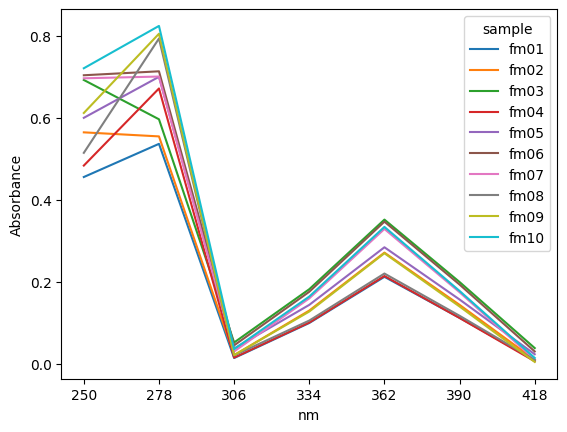

In [12]:
raw_plt_axes = data.transpose().plot()
raw_plt_axes.set_xlabel('nm')
_ = raw_plt_axes.set_ylabel('Absorbance')

### Get the selection of the data table designated as Y-data

In [13]:
y = named_Obs_dataFrame.loc['fm01':'fm10' , ['Met']]
y

,Met
sample,
fm01,0.19112
fm02,0.19112
fm03,0.19112
fm04,0.23890
fm05,0.23890
fm06,0.23890
fm07,0.23890
fm08,0.28668
fm09,0.28668


### Evaluate the possible number of components to use in the YO-PLS model 
Note that we use an estimation based on PLS, this is because there is no difference between YO-PLS and PLS when it comes to predictions, which is what is used in the creoss-valiation leading to the Q" values here.  

Max number of components reduced to: 4
Q2 [0.66441481 0.99013783 0.99404477 0.99404441]


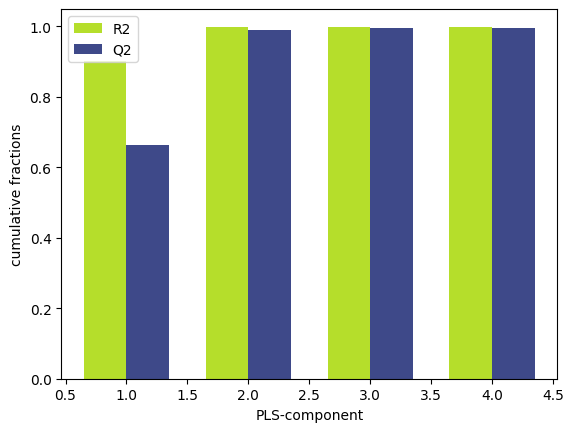

In [16]:
R2, Q2 = mv.evalPLS_Q2(data, y)
print('Q2', Q2)

### As the Q2 values levels out at 2 components, 2 components are selected

In [17]:
M1 = mv.yo_PLS_model(n_components=2)

In [18]:
M1.fit(data, y)

### Check the shape of predictive YO-PLS loadings (P)

In [19]:
M1.P

,250,278,306,334,362,390,418
p1,0.178012,0.982739,-0.010656,-0.017686,-0.014719,-0.02604,-0.035204


Text(0, 0.5, 'predictive loadings, normalized')

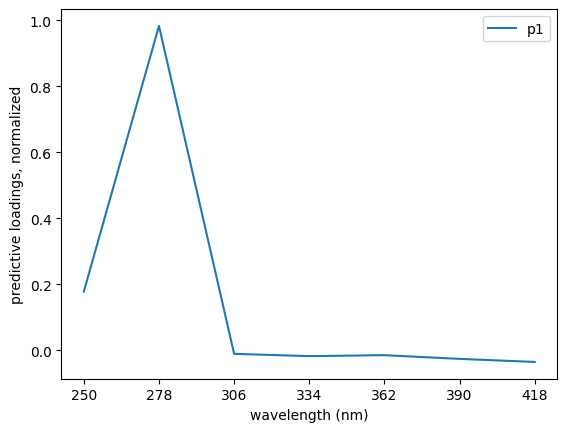

In [22]:
handle=M1.P.transpose().plot()
handle.set_xlabel('wavelength (nm)')
handle.set_ylabel('predictive loadings, normalized')

Text(0, 0.5, 'orthogonal loadings, normalized')

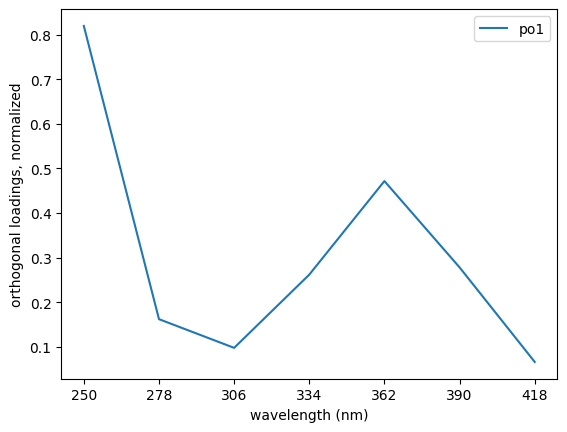

In [24]:
handle = M1.Po.transpose().plot()
handle.set_xlabel('wavelength (nm)')
handle.set_ylabel('orthogonal loadings, normalized')

### Combine predictive and orthogonal loadings in one plot

In [26]:
rows = M1.P_Po.index.isin(['p1', 'po1'])
rows

array([ True,  True])

In [27]:
M1.P_Po[rows]

,250,278,306,334,362,390,418
p1,0.178012,0.982739,-0.010656,-0.017686,-0.014719,-0.026040,-0.035204
po1,0.819579,0.161997,0.097668,0.261900,0.471658,0.278097,0.066127


Text(0, 0.5, 'orthogonal loadings, normalized')

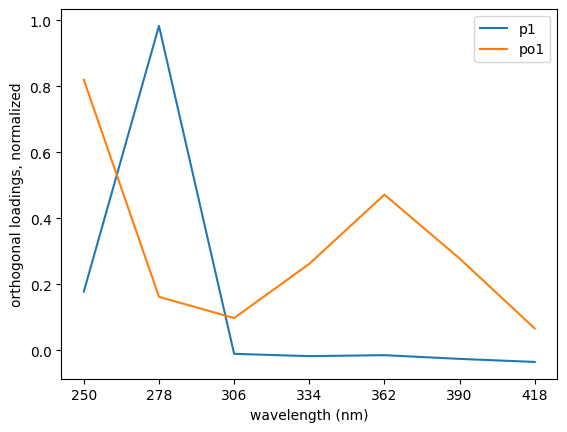

In [28]:
axP_Po = M1.P_Po[rows].transpose().plot()
axP_Po.set_xlabel('wavelength (nm)')
axP_Po.set_ylabel('orthogonal loadings, normalized')

### Save Figure using matplotlib savefig function

In [29]:
axP_Po_fig = axP_Po.get_figure()
axP_Po_fig.savefig('testsave_P_Po.png')

### Save zoomable Figure in html file
(using the bokeh python library)

In [31]:
attrib = {}
attrib['xlabel'] = 'wavelength (nm)'
attrib['ylabel'] = 'orthogonal loadings, normalized'
mv.save_zoomable_plot(M1.P_Po[rows].transpose(), 'zoomable_P_Po', attrib=attrib)

Plot was saved at: zoomable_P_Po_.html


### Show the scores, both predictive and orthogonal

In [37]:
M1.T_To

,t1,to1
sample,,
fm01,-0.130022,-0.154645
fm02,-0.131145,-0.027039
fm03,-0.119710,0.140186
fm04,0.005794,-0.147695
fm05,0.008812,0.000032
fm06,0.001502,0.128214
fm07,-0.003057,0.102445
fm08,0.125973,-0.131376
fm09,0.122512,-0.022618


<Axes: xlabel='t1', ylabel='to1'>

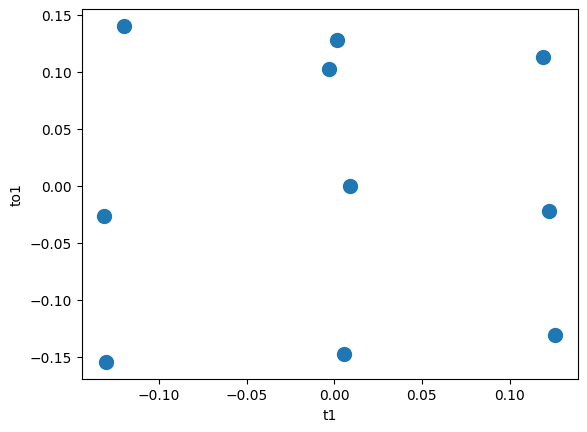

In [40]:
M1.T_To.plot.scatter(x='t1', y='to1', s=100)

### Alternatively, plot them using mv.Fig to also get numbered spectra

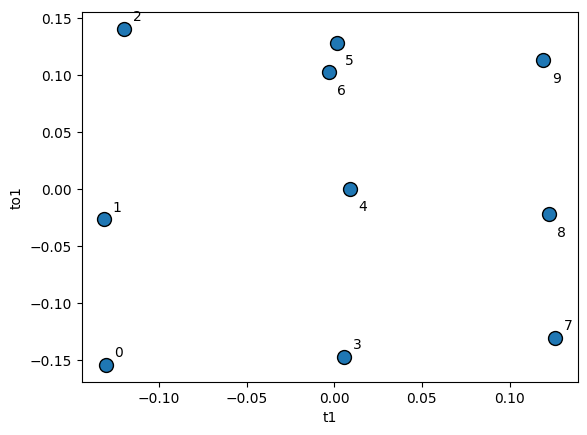

In [43]:
f2 = mv.Fig()
f2.scatter_plot(np.asarray(M1.T)[:,0], np.asarray(M1.To)[:,0])
f2.xlabel('t1')
f2.ylabel('to1')

### Show the amount of variation in X that is modelled by the predictive component
i.e. the varation in X correlated with the y-variation

In [44]:
M1.R2X_pred

,R2X_pred
1,0.409975


### and the amount of modelled variation in X that is orthogonal or independent of y

In [45]:
M1.R2X_orth

,R2X_orth
1,0.583718


### Summary
By y-orthogonal PLS, it is possible to extract the spectral shape of the chemical substance that varies in correlation with the variation in y even in a mixture of other substances with other spectral shapes. Best results are obtained when a representative set of random combinations of the chemical substances are present in the training set. Even better and the most economical way is if it is possible to vary the amounts of all substances in a statistical design according to design of experiments (DoE) principles.  